# Discussion 03: Plotting and Functions

Welcome to Discussion 03! 

This week, we will go over plotting, writing functions, and utilizing the ```.apply()``` function to modify DataFrames.

You can find additional help on these topics in the course [textbook](https://eldridgejm.github.io/dive_into_data_science/front.html).

[Here](https://ucsd-ets.github.io/dsc10-2020-fa/published/default/reference/babypandas-reference.pdf) is a pointer to that reference sheet we saw last time.

<img src="data/panda_lounging.jpeg" width="1000">

### Remember the calfire dataset?
We're going to use it again!

In [1]:
import babypandas as bpd
import numpy as np

import otter
grader = otter.Notebook()

calfire = bpd.read_csv('data/calfire-full.csv')
calfire

,year,month,name,cause,acres,county,longitude,latitude
0,1898,9,LOS PADRES,14 - Unknown,20539.949219,Ventura,-119.367830,34.446830
1,1898,4,MATILIJA,14 - Unknown,2641.123047,Ventura,-119.299625,34.488614
2,1898,9,COZY DELL,14 - Unknown,2974.585205,Ventura,-119.265380,34.482316
3,1902,8,FEROUD,14 - Unknown,731.481567,Ventura,-119.320979,34.417515
4,1903,10,SAN ANTONIO,14 - Unknown,380.260590,Ventura,-119.253422,34.430616
...,...,...,...,...,...,...,...,...
13459,2019,9,STAGE,7 - Arson,13.019149,Monterey,-121.599207,36.764065
13460,2019,10,CROSS,14 - Unknown,289.151428,Monterey,-120.726245,35.793698
13461,2019,9,FRUDDEN,2 - Equipment Use,11.789393,Monterey,-120.908061,35.908627
13462,2019,9,JOLON,11 - Powerline,61.592369,Monterey,-121.010025,35.910750


# Plotting

We can visualize and plot our data directly from DataFrames! 
This can be very beneficial to help us draw conclusions that would be difficult to come up with otherwise.

`df.plot(kind='...', x=..., y=...)`
- `kind= ` "scatter", "line", "bar", "barh"

`df.get(col_name).plot(kind='hist', bins=n_bins, density=True)`

## Question 1: Is the number of fires increasing?

*set ```count_is_increasing``` to True if the the number of fires is increasing*

<!--
BEGIN QUESTION
name: q11
-->

In [2]:
count_is_increasing = True # SOLUTION
count_is_increasing

True

In [ ]:
grader.check("q11")

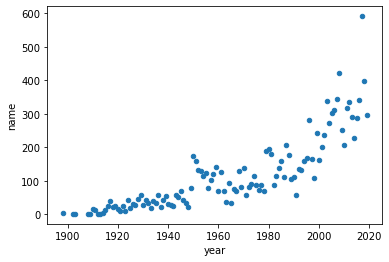

In [4]:
counts_by_year = ( # SOLUTION NO PROMPT
    calfire # original dataset # SOLUTION NO PROMPT
    .drop(columns=["month","cause","acres","county","longitude","latitude"]) # drop other columns # SOLUTION NO PROMPT
    .groupby("year").count() # get fire counts per year # SOLUTION NO PROMPT
    .reset_index() # move year back to column # SOLUTION NO PROMPT
) # SOLUTION NO PROMPT

counts_by_year.plot(kind='scatter', x='year', y='name') # choose x and y axes data # SOLUTION NO PROMPT

## Question 2: What about the median size of a fire? (is it also increasing?)
*set ```median_is_increasing``` to True if the the median fire size is increasing*

<!--
BEGIN QUESTION
name: q12
-->

In [5]:
median_is_increasing = False # SOLUTION
median_is_increasing

False

In [ ]:
grader.check("q12")

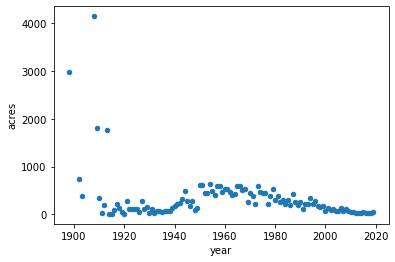

In [7]:
median_by_year = ( # SOLUTION NO PROMPT
    calfire # original dataset # SOLUTION NO PROMPT
    .drop(columns=["month","name","cause","county","longitude","latitude"]) # drop other columns # SOLUTION NO PROMPT
    .groupby("year").median() # get fire median per year # SOLUTION NO PROMPT
    .reset_index() # move year back to column # SOLUTION NO PROMPT
) # SOLUTION NO PROMPT

median_by_year.plot(kind='scatter', x='year', y='acres') # choose x and y axes data # SOLUTION NO PROMPT

## Question 3: Is the largest fire per year increasing?
*set ```max_fire_is_increasing``` to True if the the largest fire per year is increasing*

<!--
BEGIN QUESTION
name: q13
-->

In [8]:
max_is_increasing = True # SOLUTION
max_is_increasing

True

In [ ]:
grader.check("q13")

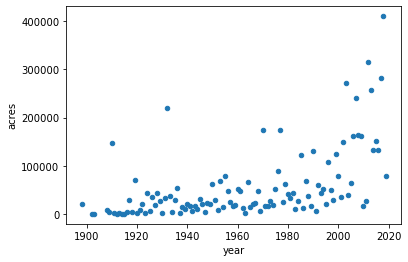

In [10]:
max_by_year = ( # SOLUTION NO PROMPT
    calfire # original dataset # SOLUTION NO PROMPT
    .drop(columns=["month","name","cause","county","longitude","latitude"]) # drop other columns # SOLUTION NO PROMPT
    .groupby("year").max() # get fire max per year # SOLUTION NO PROMPT
    .reset_index() # move year back to column # SOLUTION NO PROMPT
) # SOLUTION NO PROMPT

max_by_year.plot(kind='scatter', x='year', y='acres') # choose x and y axes data # SOLUTION NO PROMPT

## Question 4: Is there an association between latitude and fire size?
*set ```latitude_size_association``` to True if there is an association between latitude and fire size*

<!--
BEGIN QUESTION
name: q14
-->

In [11]:
latitude_size_association = False # SOLUTION
latitude_size_association 

False

In [ ]:
grader.check("q14")

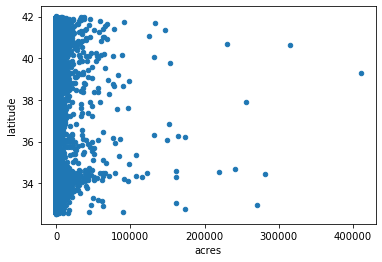

In [13]:
lat_fire = ( # SOLUTION NO PROMPT
    calfire # original dataset # SOLUTION NO PROMPT
    .drop(columns=['month','name','cause','longitude','county','year']) # drop other data # SOLUTION NO PROMPT
) # SOLUTION NO PROMPT
lat_fire.plot(kind='scatter', x='acres', y='latitude') # SOLUTION NO PROMPT

## Question 5: What is the distribution of fire sizes?

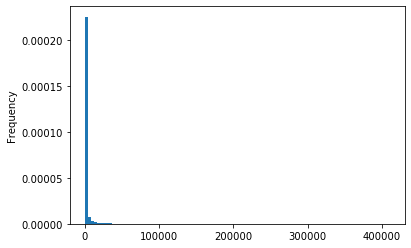

In [14]:
acres_df = calfire.drop(columns=['month','name','cause','latitude','longitude','county','year']) # SOLUTION NO PROMPT
acres_df.get('acres').plot(kind='hist', bins=100, density=True) # SOLUTION NO PROMPT

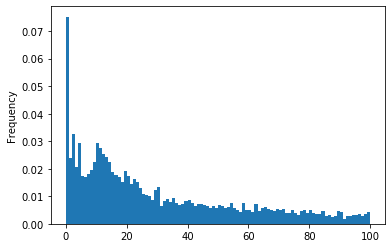

In [15]:
small_fires = acres_df[(acres_df.get("acres") < 100)] # SOLUTION NO PROMPT
small_fires.get('acres').plot(kind='hist', bins=100, density=True) # SOLUTION NO PROMPT

## Question 6: Plot the number of fires due to each cause.

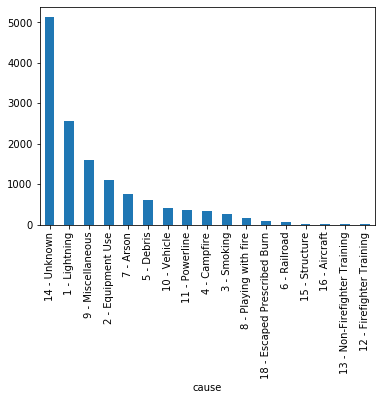

In [16]:
( # SOLUTION NO PROMPT
    calfire # SOLUTION NO PROMPT
    .groupby('cause').count() # SOLUTION NO PROMPT
    .get("year") # SOLUTION NO PROMPT
    .sort_values(ascending = False) # SOLUTION NO PROMPT
    .plot(kind = 'bar') # SOLUTION NO PROMPT
) # SOLUTION NO PROMPT

## Question 7a: In what times of the year are fires most common?

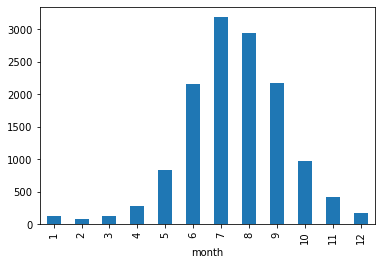

In [17]:
( # SOLUTION NO PROMPT
    calfire # SOLUTION NO PROMPT
    .groupby('month').count() # SOLUTION NO PROMPT
    .get("year") # SOLUTION NO PROMPT
    .plot(kind = 'bar') # SOLUTION NO PROMPT
) # SOLUTION NO PROMPT

## Question 7b: In what times of the year are *large* fires most common in *Southern California*?

By large, say over 5,000 acres. By SoCal, we mean latitude < 37.

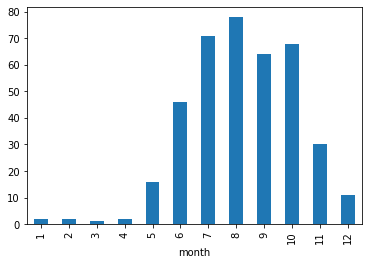

In [18]:
# BEGIN SOLUTION
(
    calfire[(calfire.get('latitude') < 36.5) & (calfire.get('acres') > 5_000)]
    .groupby('month').count()
    .get('year').plot(kind='bar')
)
# END SOLUTION

## Question 8: On the same plot, show natural vs. human-caused over time.

- That is, have one line for the number of fires caused by lightning over time.
- Another line for all other causes over time.

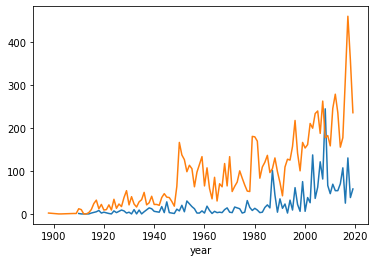

In [19]:
cause_only = calfire.drop(columns=["month","name","acres","county","longitude","latitude"]) # drop other columns # SOLUTION NO PROMPT

natural_fires = ( # SOLUTION NO PROMPT
    cause_only[cause_only.get("cause") == "1 - Lightning"] # SOLUTION NO PROMPT
    .groupby("year").count() # get fire counts per year # SOLUTION NO PROMPT
    .get("cause") # SOLUTION NO PROMPT
) # SOLUTION NO PROMPT

human_caused_fires = ( # SOLUTION NO PROMPT
    cause_only[cause_only.get("cause") != "1 - Lightning"] # SOLUTION NO PROMPT
    .groupby("year").count() # get fire counts per year # SOLUTION NO PROMPT
    .get("cause") # SOLUTION NO PROMPT
) # SOLUTION NO PROMPT

natural_fires.plot(kind='line') # choose x and y axes data # SOLUTION NO PROMPT
(human_caused_fires.plot(kind='line')) # choose x and y axes data # SOLUTION NO PROMPT

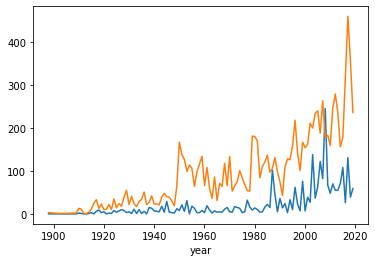

In [20]:
calfire_binarized = calfire.assign(lightning_caused = (calfire.get('cause') == '1 - Lightning')) # SOLUTION NO PROMPT
calfire_binarized.groupby('year').sum().get("lightning_caused").plot(kind = 'line') # SOLUTION NO PROMPT
(calfire_binarized.groupby('year').count().get("lightning_caused") - calfire_binarized.groupby('year').sum().get("lightning_caused")).plot(kind = 'line') # SOLUTION NO PROMPT

# Functions and Apply

Now lets take a look at writing our own functions and then applying these functions to DataFrames.

## Question 9: Cause Codes

- Currently, the causes are written as `<code> - <name>`. Like: `7 - Arson`.
- Write a function which takes in the cause and outputs only the name.

In [21]:
causes_old = list(calfire.groupby("cause").count().index) # visualize old causes # SOLUTION NO PROMPT
causes_old # SOLUTION NO PROMPT

['1 - Lightning',
 '10 - Vehicle',
 '11 - Powerline',
 '12 - Firefighter Training',
 '13 - Non-Firefighter Training',
 '14 - Unknown',
 '15 - Structure',
 '16 - Aircraft',
 '18 - Escaped Prescribed Burn',
 '2 - Equipment Use',
 '3 - Smoking',
 '4 - Campfire',
 '5 - Debris',
 '6 - Railroad',
 '7 - Arson',
 '8 - Playing with fire',
 '9 - Miscellaneous']

In [22]:
def convert_cause(cause): # SOLUTION NO PROMPT
    '''Takes in cause of form [## - <name>] and returns name''' # SOLUTION NO PROMPT
    split = cause.split(" ") # split by space character # SOLUTION NO PROMPT
    cause_name = " ".join(split[2:]) # grab just the name # SOLUTION NO PROMPT
    return cause_name # SOLUTION NO PROMPT

In [23]:
# print out causes before and after # SOLUTION NO PROMPT
for cause in causes_old: # SOLUTION NO PROMPT
    print(f"{cause} --> {convert_cause(cause)}") # SOLUTION NO PROMPT

1 - Lightning --> Lightning
10 - Vehicle --> Vehicle
11 - Powerline --> Powerline
12 - Firefighter Training --> Firefighter Training
13 - Non-Firefighter Training --> Non-Firefighter Training
14 - Unknown --> Unknown
15 - Structure --> Structure
16 - Aircraft --> Aircraft
18 - Escaped Prescribed Burn --> Escaped Prescribed Burn
2 - Equipment Use --> Equipment Use
3 - Smoking --> Smoking
4 - Campfire --> Campfire
5 - Debris --> Debris
6 - Railroad --> Railroad
7 - Arson --> Arson
8 - Playing with fire --> Playing with fire
9 - Miscellaneous --> Miscellaneous


## Question 10:  Replace the `cause` column with one containing only the names

In [24]:
cause_names = calfire.get("cause").apply(convert_cause) # apply function to cause # SOLUTION NO PROMPT
calfire = calfire.assign(cause=cause_names) # assign new column # SOLUTION NO PROMPT
calfire # visualize # SOLUTION NO PROMPT

,year,month,name,cause,acres,county,longitude,latitude
0,1898,9,LOS PADRES,Unknown,20539.949219,Ventura,-119.367830,34.446830
1,1898,4,MATILIJA,Unknown,2641.123047,Ventura,-119.299625,34.488614
2,1898,9,COZY DELL,Unknown,2974.585205,Ventura,-119.265380,34.482316
3,1902,8,FEROUD,Unknown,731.481567,Ventura,-119.320979,34.417515
4,1903,10,SAN ANTONIO,Unknown,380.260590,Ventura,-119.253422,34.430616
...,...,...,...,...,...,...,...,...
13459,2019,9,STAGE,Arson,13.019149,Monterey,-121.599207,36.764065
13460,2019,10,CROSS,Unknown,289.151428,Monterey,-120.726245,35.793698
13461,2019,9,FRUDDEN,Equipment Use,11.789393,Monterey,-120.908061,35.908627
13462,2019,9,JOLON,Powerline,61.592369,Monterey,-121.010025,35.910750


## Question 11:  Convert months numbers to names.

- Write a function that converts a month's number (1, 2, 3, ..., 12) to the word (January, ..., December).

In [25]:
def month_number_to_name(month_number):
    import calendar
    month_name = calendar.month_name[month_number]
    return month_name

In [26]:
months = list(calfire.groupby("month").count().index) # visualize old causes # SOLUTION NO PROMPT
months # SOLUTION NO PROMPT

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [27]:
# print out months before and after # SOLUTION NO PROMPT
for cause in months: # SOLUTION NO PROMPT
    print(f"{cause} --> {month_number_to_name(cause)}") # SOLUTION NO PROMPT

1 --> January
2 --> February
3 --> March
4 --> April
5 --> May
6 --> June
7 --> July
8 --> August
9 --> September
10 --> October
11 --> November
12 --> December


In [28]:
month_names = calfire.get("month").apply(month_number_to_name) # apply function to month # SOLUTION NO PROMPT
calfire = calfire.assign(month=month_names) # assign new column # SOLUTION NO PROMPT
calfire # visualize # SOLUTION NO PROMPT

,year,month,name,cause,acres,county,longitude,latitude
0,1898,September,LOS PADRES,Unknown,20539.949219,Ventura,-119.367830,34.446830
1,1898,April,MATILIJA,Unknown,2641.123047,Ventura,-119.299625,34.488614
2,1898,September,COZY DELL,Unknown,2974.585205,Ventura,-119.265380,34.482316
3,1902,August,FEROUD,Unknown,731.481567,Ventura,-119.320979,34.417515
4,1903,October,SAN ANTONIO,Unknown,380.260590,Ventura,-119.253422,34.430616
...,...,...,...,...,...,...,...,...
13459,2019,September,STAGE,Arson,13.019149,Monterey,-121.599207,36.764065
13460,2019,October,CROSS,Unknown,289.151428,Monterey,-120.726245,35.793698
13461,2019,September,FRUDDEN,Equipment Use,11.789393,Monterey,-120.908061,35.908627
13462,2019,September,JOLON,Powerline,61.592369,Monterey,-121.010025,35.910750


## Question 12:  Closest fire

- Write a function that accepts a latitude/longitude pair and returns the name of the closest fire.

In [29]:
def get_closest_fire(latitude, longitude): # SOLUTION NO PROMPT
    
    # target point # SOLUTION NO PROMPT
    target = [latitude, longitude] # SOLUTION NO PROMPT
    
    # get fire coords # SOLUTION NO PROMPT
    fire_coords = calfire.get(["latitude","longitude"]).to_numpy() # SOLUTION NO PROMPT
    
    # distance and index variables # SOLUTION NO PROMPT
    min_dist = np.Inf # SOLUTION NO PROMPT
    fire_index = -1 # SOLUTION NO PROMPT

    # loop over all fires # SOLUTION NO PROMPT
    for index,fire in enumerate(fire_coords): # SOLUTION NO PROMPT
        # distance from input to current fire # SOLUTION NO PROMPT
        cur_dist = np.linalg.norm(fire-target) # SOLUTION NO PROMPT
        # reset minimum if we find a closer fire # SOLUTION NO PROMPT
        if cur_dist < min_dist: # SOLUTION NO PROMPT
            min_dist = cur_dist # SOLUTION NO PROMPT
            fire_index = index # SOLUTION NO PROMPT
    
    # get the name of the fire # SOLUTION NO PROMPT
    closest_fire = calfire.iloc[fire_index].get("name") # SOLUTION NO PROMPT
    
    return closest_fire # SOLUTION NO PROMPT

In [30]:
from scipy.spatial.distance import cdist # SOLUTION NO PROMPT
def get_closest_fire_cdist(latitude, longitude): # SOLUTION NO PROMPT
    
    # target point # SOLUTION NO PROMPT
    target = [latitude, longitude] # SOLUTION NO PROMPT
    
    # get fire coords # SOLUTION NO PROMPT
    fire_coords = calfire.get(["latitude","longitude"]).to_numpy() # SOLUTION NO PROMPT
    
    # get index of min fire # SOLUTION NO PROMPT
    fire_index = cdist([target], fire_coords).argmin() # SOLUTION NO PROMPT
    
    # get the name of the fire # SOLUTION NO PROMPT
    closest_fire = calfire.iloc[fire_index].get("name") # SOLUTION NO PROMPT

    return closest_fire # SOLUTION NO PROMPT

In [31]:
geisel = [32.881158, -117.237566] # SOLUTION NO PROMPT
closest_fire = get_closest_fire(geisel[0], geisel[1]) # SOLUTION NO PROMPT
closest_fire # SOLUTION NO PROMPT

'LOCAL ASSIST #22'

In [32]:
grader.check_all()